In [5]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
df=pd.read_csv('train.csv')
df1=pd.read_csv('test.csv')

#Missing values
del df['Id']
for c in df.columns:
    if df[c].dtypes=='int64' or  df[c].dtypes=='float64':
       df[c]=df[c].fillna(df[c].mean())
    else:
        
       df[c]=df[c].fillna(df[c].mode())
Ids=df1['Id']
del df1['Id']

for c in df1.columns:
    if df1[c].dtypes=='int64' or  df1[c].dtypes=='float64':
       df1[c]=df1[c].fillna(df1[c].mean())
    else:
        
       df1[c]=df1[c].fillna(df1[c].mode())
l2=[]
for c in df1.columns:
    if len(df1[df1[c].isnull()==True][c])>0 :
        l2.append(c)
        
l1=[]
for c in df.columns:
    if len(df[df[c].isnull()==True][c])>0:
        l1.append(c)
        
l3=list(set(l1).union(set(l2)))
l3


for c in df.columns:
    if c in l3 :
        #print(c)
        del df[c]
for c in df1.columns:
    if c in l3 :
        #print(c)
        del df1[c]
#encoding
from sklearn import preprocessing
y=df['SalePrice']   
del df['SalePrice']


for c in df.columns:
    le=preprocessing.LabelEncoder().fit(df[c])
    df[c] =le.transform(df[c])
x=df


#split 
#x_train=df[:900]
#y_train=y[:900]
#x_test=df[900:]
#ytest=y[900:]

#Xtrain=x_train
#pd.concat([x_train,x_train,x_train,x_train,x_train,x_train,x_train,x_train,x_train,x_train])
#ytrain=y_train
#pd.concat([y_train,y_train,y_train,y_train,y_train,y_train,y_train,y_train,y_train,y_train])
#Scaling
from sklearn.preprocessing import StandardScaler,Normalizer
scl=StandardScaler()

x=scl.fit_transform(x)





#dimension
#for i in range(1,64):
p=PCA(n_components=10
      , copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
x11=p.fit(x).transform(x)
#train test split
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x11, y,test_size=0.33)

Compare(Xtrain, Xtest, ytrain, ytest)   
#x.shape


Random forest --- 1265438872.49 0.827627373226
Gradient Boosting  --- 1309002555.53 0.821693316165
XG Boosting  --- 1449110074.4 0.802608474072
Linear  --- 1775176454.98 0.758193117674


In [4]:
def Compare(Xtrain, Xtest, ytrain, ytest):

    #Random forest
 from sklearn.ensemble import RandomForestRegressor
 rf=RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1,
                         
                         min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                         bootstrap=True, oob_score=False, n_jobs=2, random_state=None, verbose=0, warm_start=False)

 rf.fit(Xtrain,ytrain)
 y_pred=rf.predict(Xtest)
 y_pred
 from sklearn.metrics import mean_squared_error,r2_score
 mse=mean_squared_error(ytest,y_pred)
 print("Random forest","---",mse,r2_score(ytest,y_pred))

 #Gradient
 from sklearn.ensemble import GradientBoostingRegressor
 reg=GradientBoostingRegressor(loss='ls', learning_rate=0.2, n_estimators=100, subsample=1.0,
                              criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                              min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, 
                              alpha=0.1,
                              verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto')
 reg.fit(Xtrain,ytrain)
 y_pred=reg.predict(Xtest)
 y_pred
 from sklearn.metrics import mean_squared_error,r2_score
 mse=mean_squared_error(ytest,y_pred)

 print("Gradient Boosting ","---",mse,r2_score(ytest,y_pred))

 #XGBOOSt
 import xgboost
 # Let's try XGboost algorithm to see if we can get better results
 xgb = xgboost.XGBRegressor(max_depth=4, learning_rate=0.1, n_estimators=100, silent=True, objective='reg:linear', nthread=-1, gamma=0, 
                           
                           min_child_weight=1,
                           max_delta_step=0, subsample=1,
                           colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, 
                           base_score=0.5, seed=0, missing=None)
 xgb.fit(Xtrain,ytrain)
 y_pred=xgb.predict(Xtest)
 y_pred
 from sklearn.metrics import mean_squared_error,r2_score
 mse=mean_squared_error(ytest,y_pred)
 print("XG Boosting ","---",mse,r2_score(ytest,y_pred))


 #linear regression
 from sklearn.linear_model import LinearRegression
 reg=LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
 reg.fit(Xtrain,ytrain)
 y_pred=reg.predict(Xtest)

 from sklearn.metrics import mean_squared_error,r2_score
 mse=mean_squared_error(ytest,y_pred)
 print("Linear ","---",mse,r2_score(ytest,y_pred))

In [2]:
from sklearn.decomposition import PCA
p=PCA(n_components=df.shape[1]-1, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
p.fit(x)

PCA(copy=True, iterated_power='auto', n_components=55, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [110]:
v=p.explained_variance_
v=np.round(v,1)
v

array([ 8.8,  3.6,  3.4,  2.4,  2.1,  1.5,  1.5,  1.5,  1.3,  1.2,  1.2,
        1.2,  1.2,  1.1,  1.1,  1.1,  1.1,  1. ,  1. ,  1. ,  0.9,  0.9,
        0.9,  0.9,  0.9,  0.8,  0.8,  0.8,  0.8,  0.7,  0.7,  0.7,  0.6,
        0.6,  0.6,  0.6,  0.6,  0.5,  0.5,  0.5,  0.4,  0.4,  0.4,  0.3,
        0.3,  0.3,  0.3,  0.2,  0.2,  0.2,  0.1,  0.1,  0.1,  0.1,  0. ])

In [111]:
import matplotlib.pyplot as mlt

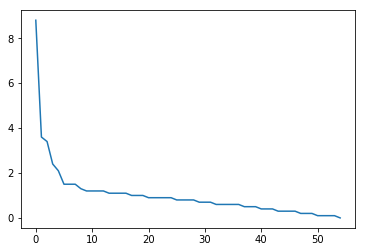

In [112]:
mlt.plot(v)

In [98]:
df.shape

(1460, 65)

In [ ]:
#Random forest

In [163]:
from sklearn.ensemble import RandomForestRegressor

    
rf=RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1,
                         
                         min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                         bootstrap=True, oob_score=False, n_jobs=2, random_state=None, verbose=0, warm_start=False)

rf.fit(Xtrain,ytrain)
y_pred=rf.predict(Xtest)
y_pred
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(ytest,y_pred)
print(mse,r2_score(ytest,y_pred))

1102460997.06 0.845096919092


In [ ]:
#gradient


In [166]:
from sklearn.ensemble import GradientBoostingRegressor
mse=100000000000000000
r2=-111111111
for i in range(1 , 10):
 ba=GradientBoostingRegressor(loss='ls', learning_rate=i/100
                             , n_estimators=100, subsample=1.0,
                              criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                              min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, 
                              alpha=0.1,
                              verbose=0, max_leaf_nodes=2, warm_start=False, presort='auto')
 ba.fit(Xtrain,ytrain)
 y_pred=ba.predict(Xtest)
 
 from sklearn.metrics import mean_squared_error,r2_score
 if mean_squared_error(ytest,y_pred)<mse :
          mse=mean_squared_error(ytest,y_pred)
          v=i
          r2=r2_score(ytest,y_pred)
       

  #if r2_score(ytest,y_pred)>.88:
    
print(mse,r2,v)
ba=GradientBoostingRegressor(loss='ls', learning_rate=9/100
                             , n_estimators=100, subsample=1.0,
                              criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                              min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, 
                              alpha=0.1,
                              verbose=0, max_leaf_nodes=2, warm_start=False, presort='auto')
ba.fit(Xtrain,ytrain)



1311151460.34 0.815774525098 9


GradientBoostingRegressor(alpha=0.1, criterion='friedman_mse', init=None,
             learning_rate=0.09, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=2, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [ ]:
#xgboost

In [176]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error,r2_score
mse=10000000000000
r2=-1000
import xgboost
for k in range(1,5):
   
    # Let's try XGboost algorithm to see if we can get better results
       xgb = xgboost.XGBRegressor(max_depth=max_depth, learning_rate=k/100
                             , n_estimators=1499, silent=True, objective='reg:linear', nthread=1, gamma=0, 
                           
                           min_child_weight=1,
                           max_delta_step=0, subsample=1,
                           colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=2, scale_pos_weight=2, 
                           base_score=0.1, seed=0, missing=None)
       xgb.fit(Xtrain,ytrain)
       y_pred=xgb.predict(Xtest)
    
       if mean_squared_error(ytest,y_pred)<mse :
          mse=mean_squared_error(ytest,y_pred)
          v=k
          r2=r2_score(ytest,y_pred)
       

  #if r2_score(ytest,y_pred)>.88:
    
print(mse,r2,v)
xgb = xgboost.XGBRegressor(max_depth=max_depth, learning_rate=14/100
                             , n_estimators=1000, silent=True, objective='reg:linear', nthread=-1, gamma=0, 
                           
                           min_child_weight=1,
                           max_delta_step=0, subsample=1,
                           colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, 
                           base_score=0.1, seed=0, missing=None)
xgb.fit(Xtrain,ytrain)

1129745672.3 0.841263241286 3


XGBRegressor(base_score=0.1, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.14, max_delta_step=0, max_depth=9,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [800]:
#linear regression
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y,test_size=0.33)
from sklearn.linear_model import LinearRegression
reg=LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
reg.fit(Xtrain,ytrain)
y_pred=reg.predict(Xtest)

from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(ytest,y_pred)
print(mse,r2_score(ytest,y_pred))

1352646646.5 0.786217437179


In [6]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf', degree=3, gamma='auto', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, 
        verbose=False, max_iter=-1)
svr.fit(Xtrain,ytrain)
y_pred=svr.predict(Xtest)

from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(ytest,y_pred)
print(mse,r2_score(ytest,y_pred))

7801609688.55 -0.0627016320688


In [8]:
from sklearn.neural_network import MLPRegressor
mlp=MLPRegressor(hidden_layer_sizes=(100 ), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', 
                 learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
                 random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, 
                 early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)


mlp.fit(Xtrain,ytrain)
y_pred=mlp.predict(Xtest)

from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(ytest,y_pred)
print(mse,r2_score(ytest,y_pred))


41098161763.9 -4.5982143846


C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [158]:




#encoding
from sklearn import preprocessing

for c in df1.columns:
    le=preprocessing.LabelEncoder().fit(df1[c])
    df1[c] =le.transform(df1[c])

x1=df1.loc[0:]


#Scaling
from sklearn.preprocessing import StandardScaler,Normalizer
scl=StandardScaler()

x1=scl.fit_transform(x1)
p=PCA(n_components= 1,copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
x_test=p.fit(x1).transform(x1)

y_pred=xgb.predict(x_test)
y_pred


array([ 100966.6015625,  155054.15625  ,  171634.28125  , ...,
        181884.96875  ,  123803.453125 ,  215153.296875 ], dtype=float32)

In [623]:
df1.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,0,57,777,1,3,3,4,0,12,1,...,75,0,0,0,18,0,0,5,4,4
1,0,58,964,1,0,3,0,0,12,2,...,225,24,0,0,0,0,24,5,4,4
2,5,51,947,1,0,3,4,0,8,2,...,134,22,0,0,0,0,0,2,4,4
3,5,55,587,1,0,3,4,0,8,2,...,219,24,0,0,0,0,0,5,4,4
4,11,19,118,1,0,1,4,0,22,2,...,0,68,0,0,27,0,0,0,4,4


In [159]:
result=pd.DataFrame()
result['Id']=Ids
result['SalePrice']=y_pred
result.to_csv('Submission_Ankit_Srivastava.csv',index=False)

In [160]:
result.to_csv('Submission_Ankit_Srivastava.csv',index=False)


In [161]:
dfr=pd.read_csv('Submission_Ankit_Srivastava.csv',)
dfr.head()

,Id,SalePrice
0,1461,100966.601562
1,1462,155054.156250
2,1463,171634.281250
3,1464,209101.781250
4,1465,182891.578125
